In [4]:
import numpy as np 
import pandas as pd 
import os
import cv2

In [5]:
labels = os.listdir(r"C:\Users\Tushar Kakade\Documents\AEL Python Programs\CI_Programs\TermWork_2\train")

In [6]:
labels

['Closed', 'Open']

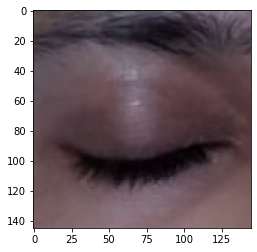

In [7]:
#visualize a random image
import matplotlib.pyplot as plt
plt.imshow(plt.imread(r"C:\Users\Tushar Kakade\Documents\AEL Python Programs\CI_Programs\TermWork_2\train\Closed\_0.jpg"))

In [8]:
a = plt.imread(r"C:\Users\Tushar Kakade\Documents\AEL Python Programs\CI_Programs\TermWork_2\train\Closed\_0.jpg")

In [9]:
a.shape

(145, 145, 3)

In [10]:
def get_data(dir_path=r"C:\Users\Tushar Kakade\Documents\AEL Python Programs\CI_Programs\TermWork_2\train"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [11]:
data_train = get_data()

0
1


In [12]:
def append_data():
    data = get_data()
    return np.array(data)

In [13]:
new_data = append_data()

0
1


<ipython-input-12-7717b78592d5>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [14]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [15]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [16]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [17]:
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [19]:
len(X_test)

436

In [23]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
import tensorflow as tf

In [21]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [24]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))


model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))


model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))


model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 143, 143, 256)     7168      
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 143, 143, 256)     1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 128)       295040    
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 69, 69, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)       

In [25]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
43/43 [==============================] - 10s 223ms/step - loss: 1.0634 - accuracy: 0.5234 - val_loss: 0.5487 - val_accuracy: 0.7734
Epoch 2/50
43/43 [==============================] - 8s 197ms/step - loss: 0.5234 - accuracy: 0.7803 - val_loss: 0.3704 - val_accuracy: 0.8391
Epoch 3/50
43/43 [==============================] - 10s 223ms/step - loss: 0.4065 - accuracy: 0.8404 - val_loss: 0.3200 - val_accuracy: 0.8910
Epoch 4/50
43/43 [==============================] - 9s 212ms/step - loss: 0.3357 - accuracy: 0.8575 - val_loss: 0.2910 - val_accuracy: 0.8806
Epoch 5/50
43/43 [==============================] - 8s 194ms/step - loss: 0.3003 - accuracy: 0.8731 - val_loss: 0.2467 - val_accuracy: 0.8927
Epoch 6/50
43/43 [==============================] - 8s 191ms/step - loss: 0.2712 - accuracy: 0.9005 - val_loss: 0.2627 - val_accuracy: 0.8858
Epoch 7/50
43/43 [==============================] - 9s 200ms/step - loss: 0.2590 - accuracy: 0.8976 - val_loss: 0.2206 - val_accuracy: 0.9100
Epoc

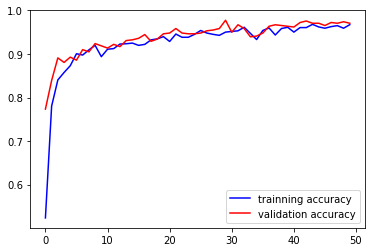

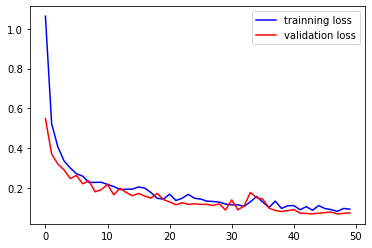

In [37]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [38]:
model.save("drowiness_new6.h5")

In [39]:
model.save("drowiness_new6.model")

Prediction

In [40]:
prediction = model.predict_classes(X_test)

Classification report

In [42]:
labels_new = ["Closed", "Open"]

In [43]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.75      0.73      0.74        63
     no_yawn       0.73      0.85      0.79        74
      Closed       0.95      0.92      0.94       215
        Open       0.96      0.94      0.95       226

    accuracy                           0.90       578
   macro avg       0.85      0.86      0.85       578
weighted avg       0.90      0.90      0.90       578



In [44]:
labels_new = ["Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5")

Prediction 
1-Closed, 2-Open

In [45]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/Closed/_101.jpg")])
np.argmax(prediction)

1

In [46]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/Open/_104.jpg")])
np.argmax(prediction)

2